<h1> Data Science in Marketing: Customer Segmentation with Python</h1>

<h2>1. Mempersiapkan Library</h2>

In [4]:
# Mempersiapkan Library
import pandas as pd # library yang digunakan untuk melakukan pemrosesan analisi data
import matplotlib.pyplot as plt # Library yang digunakan untuk visualisasi data
import seaborn as sns # Library diatas matplotlib yang digunakan untuk visualisasi data
import pickle # Library yang digunakan untuk menyimpan model
from sklearn.preprocessing import LabelEncoder # Library yang digunakan untuk encoding label
from kmodes.kmodes import KModes # Library yang digunakan untuk clustering
from kmodes.kprototypes import KPrototypes # Library yang digunakan untuk clustering
from pathlib import Path # Library yang digunakan untuk path file

<h2>2. Membaca Data Pelanggan</h2>

In [ ]:
# Membaca dataset
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/customer_segments.txt', sep='\t')

# Menampilkan 5 data teratas
display(df.head())

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


<h2>3. Melihat Informasi dari Data</h2>

In [8]:
# Menampilkan informasi dataset
print(f"Informasi Dataset : \n")
print(df.info())

Informasi Dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB
None


<h2>4. Kesimpulan: Informasi Dasar Data</h2>
<ul>
  <li>Data yang akan digunakan terdiri dari 50 baris dan 7 kolom</li>
  <li>Tidak ada null value</li>
  <li>2 kolom tipe numeric 5 kolom tipe string</li>
</ul>

<h2>5. Melakukan Eksplorasi Data</h2>

<h2>6. Eksplorasi Data Numerik</h2>

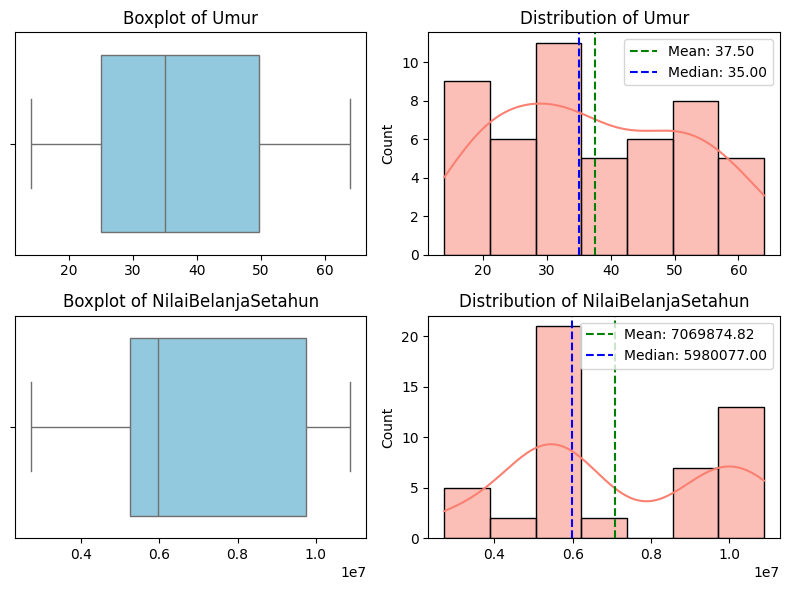

In [11]:
# Fungsi untuk membuat plot
def observasi_num(features):
       
    # Buat subplot
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))
    
    # Loop melalui setiap fitur
    for i, kol in enumerate(features):
        # Boxplot
        sns.boxplot(x=df[kol], ax=axs[i, 0], color='skyblue')
        axs[i, 0].set_title(f'Boxplot of {kol}', fontsize=12)
        axs[i, 0].set_xlabel('')
        
        # Histogram dengan KDE
        sns.histplot(df[kol], kde=True, ax=axs[i, 1], color='salmon')
        axs[i, 1].set_title(f'Distribution of {kol}', fontsize=12)
        axs[i, 1].set_xlabel('')
        
        # Tambahkan informasi statistik
        mean_val = df[kol].mean()
        median_val = df[kol].median()
        axs[i, 1].axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axs[i, 1].axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.2f}')
        axs[i, 1].legend()
    
    # Atur layout
    plt.tight_layout()
    plt.show()

# Memanggil fungsi observasi_num
observasi_num(['Umur','NilaiBelanjaSetahun'])